<a href="https://colab.research.google.com/github/Aman-Verma-2307/DIRECTION-PREDICTION-OF-EPIDEMIC/blob/master/LSTM_Time_Series_for_sin(x).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
### Importing Libraries 

# Basic Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sys
import os

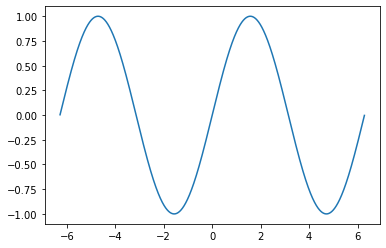

In [33]:
### Sampling Raw Data

x_raw = np.arange(2*(-3.14),2*(3.14),0.0001)
y_raw = np.sin(x_raw)

plt.plot(x_raw,y_raw)

In [54]:
### Generation of Data Set

def Generate_Dataset(x_raw,y_raw):
  
  input_space = x_raw.shape[0]
  
  X = np.zeros((input_space-4,4))
  Y = []
  
  for i in range(input_space-4):

       for j in range(4):
         X[i,j] = (x_raw[i+j])
       Y.append(y_raw[i+4])
  
  Y = np.array(Y)
  return(X,Y)

# Generating the Dataset

X,Y = Generate_Dataset(x_raw,y_raw)
print(X,Y)

[[-6.28   -6.2799 -6.2798 -6.2797]
 [-6.2799 -6.2798 -6.2797 -6.2796]
 [-6.2798 -6.2797 -6.2796 -6.2795]
 ...
 [ 6.2793  6.2794  6.2795  6.2796]
 [ 6.2794  6.2795  6.2796  6.2797]
 [ 6.2795  6.2796  6.2797  6.2798]] [ 0.0035853  0.0036853  0.0037853 ... -0.0034853 -0.0033853 -0.0032853]


In [0]:
#### Importing Keras Library

from keras import layers
from keras import Model
import keras.backend as K
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [57]:
### Defining Variables and Reshaping X

n_features = 1
X = X.reshape((X.shape[0],X.shape[1],n_features))
print(X.shape)

(125596, 4, 1)


In [56]:
### Developing the Model

model = Sequential()
model.add(LSTM(20,input_shape=(X.shape[0],X.shape[1],n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

ValueError: ignored